In [1]:
%matplotlib nbagg
from myPCA import *
import os
import sys
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
path = os.getcwd()
sys.path.append(path)

In [2]:
data = sio.loadmat(os.path.join(path,'data','filtHeartDataSet.mat'))['dataMatrix'].T
labels = sio.loadmat(os.path.join(path,'data','filtHeartDataSet.mat'))['labels']
for idx in range(labels.shape[0]):
    if labels[idx][0][0] == 'Yes':
        labels[idx] = True
    else:
        labels[idx] = False
labels = labels.astype(bool).T[0]

1) Use your class myPCA.m to find the eigenvectors and the corresponding eigenvalues that preserve at least 98% of the variance.

In [3]:
eigenvecs,eigenvals,meanDataMatrix,demeanedDataMatrix,projectedData = usingSVD(data, 0.98)

2) Project your data to the first three principle components (eigenvectors) and visualize the point cloud based on their corresponding labels, i.e. red colors for heart disease, blue colors for normal patients.

In [4]:
positiveProjectedData = projectedData.T[labels].T
negativeProjectedData = projectedData.T[np.logical_not(labels)].T

<IPython.core.display.Javascript object>


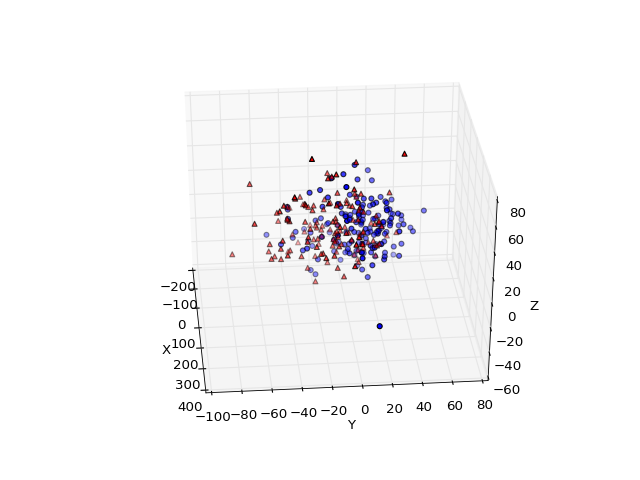

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positiveProjectedData[0], positiveProjectedData[1], positiveProjectedData[2], c='r', marker='^')
ax.scatter(negativeProjectedData[0], negativeProjectedData[1], negativeProjectedData[2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.draw()
plt.show()